In [6]:
import os
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
data = {}
for file in os.listdir():
    if '.json' in file:
        with open(file, 'r') as fp:
            data[file.split('.')[0]] = json.load(fp)


In [8]:
for file in os.listdir(os.path.join('..', 'grid_planes')):
    if 'exp_results' in file:
        with open(os.path.join(os.path.join('..', 'grid_planes'), file), 'r') as fp:
            data_tmp = fp.readlines()
            data_tmp = np.array(data_tmp[-1].split('\t')[1:], dtype=np.float64)
            #data["pmvnorm" + file.split('exp_results')[0]] = data_tmp
            data['grid'+file.split('exp_results')[0][4:]]['pmvnorm-exp'] = data_tmp
            data['grid'+file.split('exp_results')[0][4:]]['pmvnorm-std'] = [np.std(data_tmp[:i+1]) for i in range(len(data_tmp))]

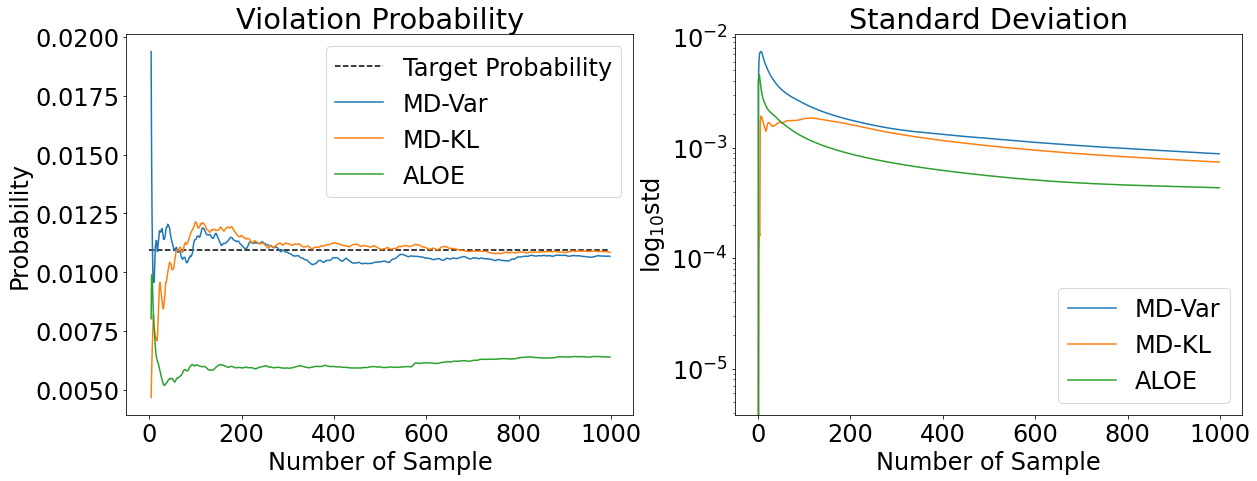

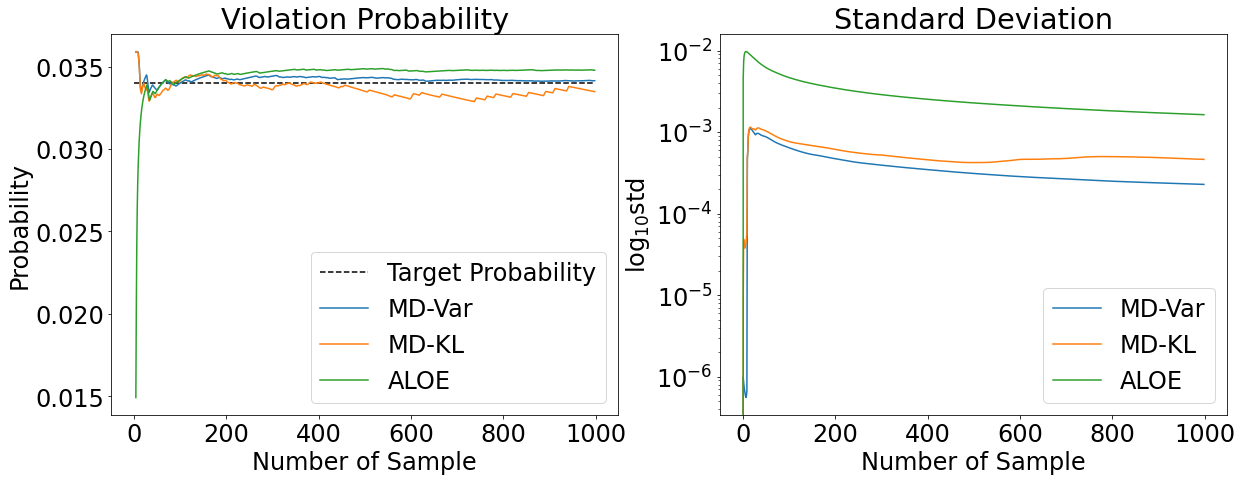

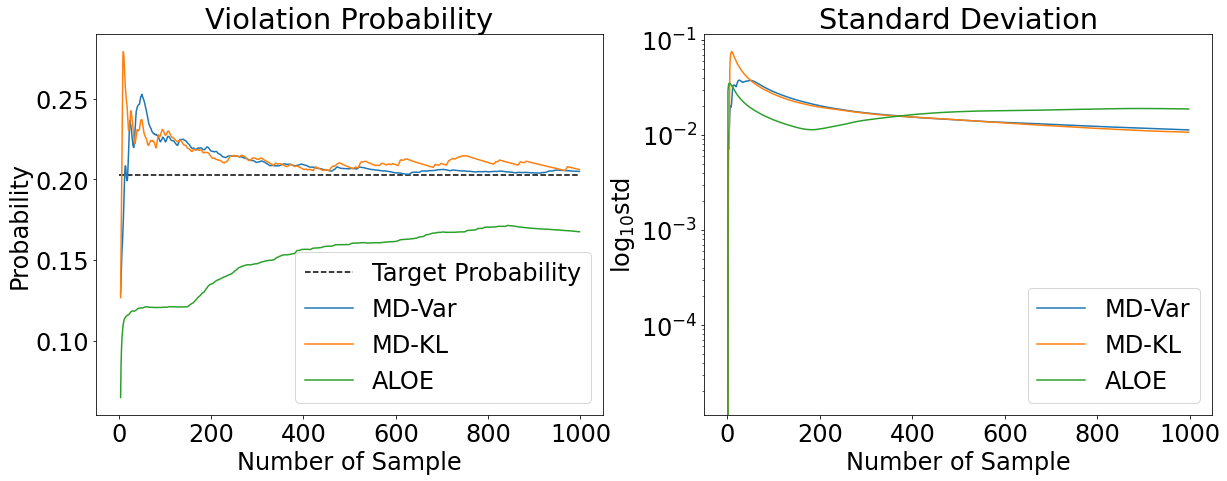

In [10]:
max_iter = 999
#plt.figure(figsize=(15,7))
for grid in data.keys():
    roll = 5
    plt.rcParams['font.size'] = '24'
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 7)
    ax1.set_title('Violation Probability')
    ax1.plot([0, max_iter], data[grid]['ALOE-inf-exp'] * np.ones(2), 'k--', label='Target Probability')
    for key in data[grid].keys():
        #if 'inf' not in key and 'pmvnorm' not in key:
        if 'inf' not in key and 'pmvnorm' not in key:
            if '-exp' in key :
                if 'ALOE' in key.split('-exp')[0]:
                    ax1.plot(pd.Series(data[grid][key][:max_iter]).rolling(roll).mean()[roll - 1:], label='ALOE')
                else:
                    ax1.plot(pd.Series(data[grid][key][:max_iter]).rolling(roll).mean()[roll - 1:], label=key.split('-exp')[0])
            if '-std' in key:
                if 'ALOE' in key.split('-std')[0]:
                    ax2.semilogy(data[grid][key][:max_iter], label='ALOE')
                else:
                    ax2.semilogy(data[grid][key][:max_iter], label=key.split('-std')[0])
    ax1.set_xlabel('Number of Sample')
    ax1.set_ylabel('Probability')
    ax1.legend()
    ax2.set_title('Standard Deviation')
    ax2.set_xlabel('Number of Sample')
    ax2.set_ylabel(r'$\log_{10}$std')
    ax2.legend()
    plt.savefig(grid +  "with_pmv.jpg")
    plt.show()